# Movimento uniformemente acelerado

Este notebook simula um problema inverso linear que estima posição inicial, a velocidade inicial e a aceleração da gravidade de um corpo em movimento uniformemente acelerado. Consideramos que o movimento deste corpo é somente na vertical, e a única força que age sobre ele é a força peso. 

## Importando as bibliotecas 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gerando os pontos nos quais as medidas são efetuadas

In [2]:
t = np.linspace(0.,20.,num=20) # em segundos

In [3]:
t

array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
        5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
       10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
       15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ])

## Velocidade inicial e a aceleração da gravidade

In [4]:
g = -9.8

In [5]:
V0 = 100.

In [6]:
S0 = 20.

In [7]:
p_true = np.array([S0,V0,g])

### Cálculo das posições verdadeiras segundo a equação horária

In [8]:
S = S0 + V0*t + 0.5*g*t*t

#### Gerando dados com ruído aleatórios

In [9]:
np.random.seed(40)
mu, std = 0., 10.
r = np.random.normal(mu,std,t.size)

In [10]:
S_obs = S + r

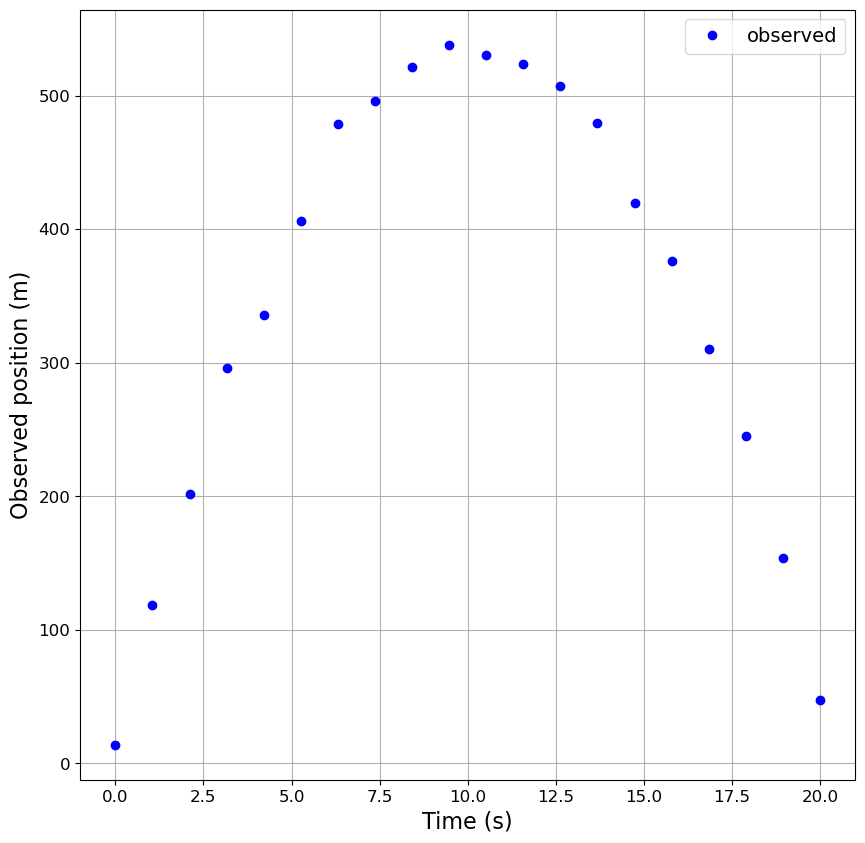

In [11]:
plt.figure(figsize=(10,10))
plt.plot(t, S_obs, 'bo', label = 'observed')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Observed position (m)', fontsize = 16)
plt.grid()
plt.show()

## Resolvendo o problema inverso

### Matriz de sensibilidade

In [12]:
G = np.empty((t.size,p_true.size))

In [13]:
G[:,0] = np.ones_like(t)
G[:,1] = t
G[:,2] = 0.5*t*t

In [14]:
G

array([[  1.        ,   0.        ,   0.        ],
       [  1.        ,   1.05263158,   0.55401662],
       [  1.        ,   2.10526316,   2.21606648],
       [  1.        ,   3.15789474,   4.98614958],
       [  1.        ,   4.21052632,   8.86426593],
       [  1.        ,   5.26315789,  13.85041551],
       [  1.        ,   6.31578947,  19.94459834],
       [  1.        ,   7.36842105,  27.1468144 ],
       [  1.        ,   8.42105263,  35.45706371],
       [  1.        ,   9.47368421,  44.87534626],
       [  1.        ,  10.52631579,  55.40166205],
       [  1.        ,  11.57894737,  67.03601108],
       [  1.        ,  12.63157895,  79.77839335],
       [  1.        ,  13.68421053,  93.62880886],
       [  1.        ,  14.73684211, 108.58725762],
       [  1.        ,  15.78947368, 124.65373961],
       [  1.        ,  16.84210526, 141.82825485],
       [  1.        ,  17.89473684, 160.11080332],
       [  1.        ,  18.94736842, 179.50138504],
       [  1.        ,  20.     

### Resolvendo o sistema linear

In [15]:
def L2_norm(A,d):
    At = A.T
    AtA = np.dot(At,A)
    Atd = np.dot(At,d)
    m = np.linalg.solve(AtA,Atd)
    return m 

In [16]:
p_est = L2_norm(G,S_obs)

In [17]:
S_pred = np.dot(G,p_est)

## Visualizando o resultado

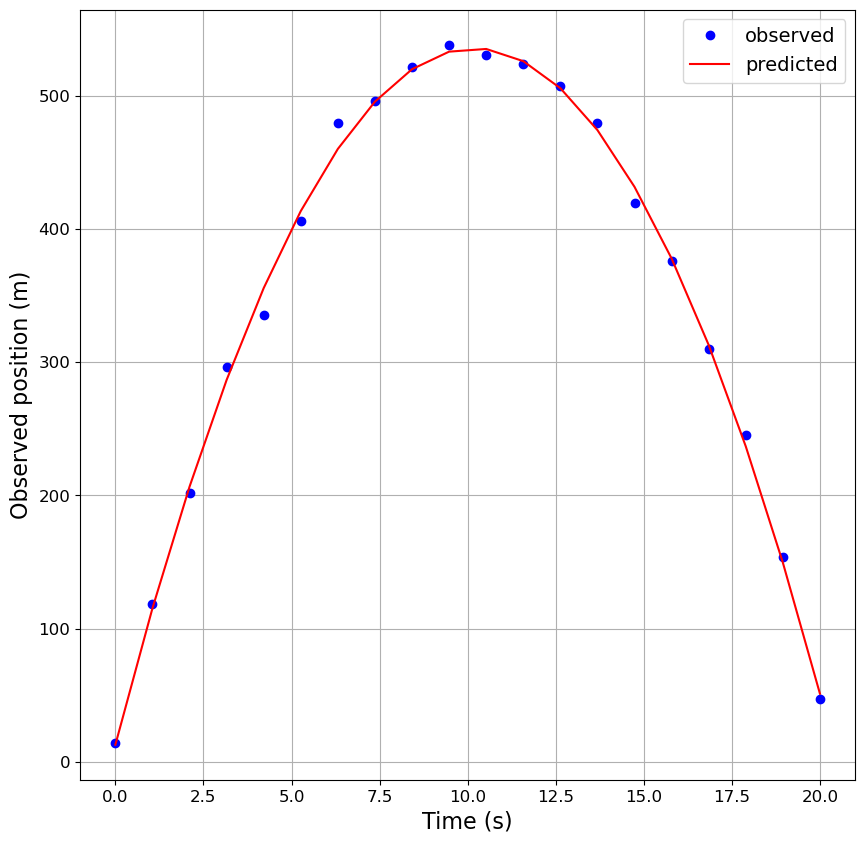

In [18]:
plt.figure(figsize=(10,10))
plt.plot(t, S_obs, 'bo', label = 'observed')
plt.plot(t, S_pred, 'r-', label = 'predicted')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Observed position (m)', fontsize = 16)
plt.grid()
plt.show()

### Comparação entre estimado e verdadeiro

In [19]:
print (p_true)
print (p_est)

[ 20.  100.   -9.8]
[ 12.97827874 102.55949528 -10.06442317]
